In [13]:
import numpy as np
import matplotlib
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
from mpl_toolkits.mplot3d import axes3d

w = 11
h = 8
lw = 0.6

# <center> First Order Reversal Curve (FORC) </center>

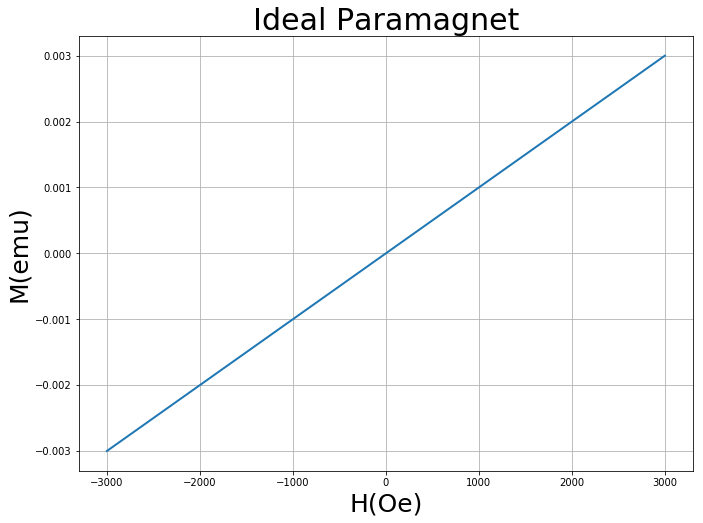

In [14]:
plt.figure(figsize=(w,h))
x_para = np.linspace(-3000,3000)
y_para = x_para/1e6
plt.plot(x_para,y_para,linewidth=2)
plt.title('Ideal Paramagnet',size=30)
plt.ylabel('M(emu)',size=25)
plt.xlabel('H(Oe)',size=25)
plt.grid()
plt.show()

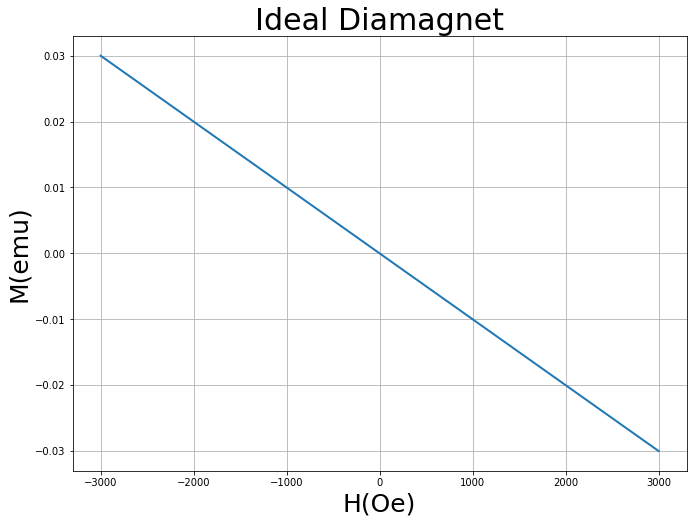

In [15]:
plt.figure(figsize=(w,h))
x_dia = np.linspace(-3000,3000)
y_dia = -x_para/1e5
plt.plot(x_dia,y_dia,linewidth=2)
plt.title('Ideal Diamagnet',size=30)
plt.ylabel('M(emu)',size=25)
plt.xlabel('H(Oe)',size=25)
plt.grid()
plt.show()

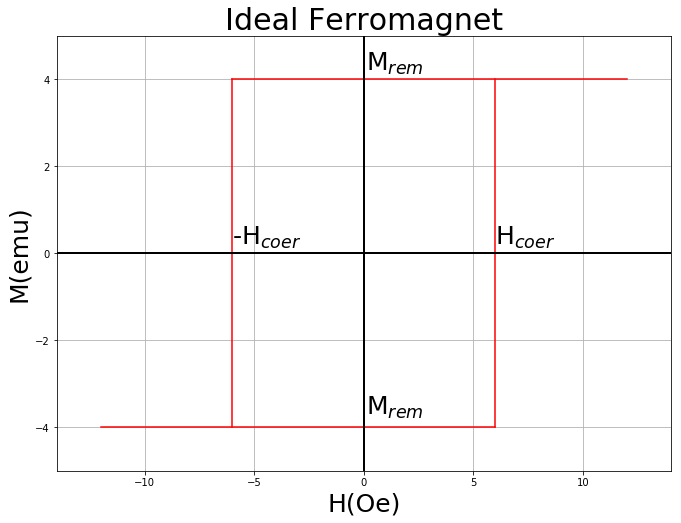

In [16]:
plt.figure(figsize=(w,h))
sat = 12
coer = 6
rem = 4
plt.plot([sat,-coer],[rem,rem],c='r')
plt.plot([-coer,-coer],[rem,-rem],c='r')
plt.plot([-sat,coer],[-rem,-rem],c='r')
plt.plot([coer,coer],[-rem,rem],c='r')

plt.plot([0,0],[-20,20],c='k',linewidth=2)
plt.plot([-20,20],[0,0],c='k',linewidth=2)

plt.xlim(-sat-2,sat+2)
plt.ylim(-rem-1,rem+1)

plt.text(coer,0.2,r'H$_{coer}$',size=25)
plt.text(-coer,0.2,r'-H$_{coer}$',size=25)
plt.text(0.1,rem+0.2,r'M$_{rem}$',size=25)
plt.text(0.1,-rem+0.3,r'M$_{rem}$',size=25)

#plt.plot(x_dia,y_dia,linewidth=2)
plt.title('Ideal Ferromagnet',size=30)
plt.ylabel('M(emu)',size=25)
plt.xlabel('H(Oe)',size=25)
plt.grid()
plt.show()

## ¿Cómo ver más allá?

![alt text](hyst.png "Title")

## Cada cambio en el campo produce una inestabilidad en el material, finalmente la magnetización medida es cuando el sistema llega a un estado metaestable
## <center> La energía libre de Gibbs como función de la magnetización, temperatura y campo externo aplicado está dada por </center>
## $$G(M,H_a,T) = \int d^3rA(\nabla M)^2 + f_{AN}M - \frac{1}{2}MH_{mag} - MH_a$$
### $G(M,H_a,T)$ = Exchange energy + anisotropy energy + magnetostatic energy + applied field energy

## Minimizando $G(M,H_a,T)$ respecto a $(H_a,T)$ permite encontrar los estados metaestables del material y así obtener los posibles valores de $M$

##  <center> Preisach distribution  </center>
## $$\rho(H_\alpha,H_\beta) = -\frac{1}{2}\frac{\partial^2 M(H_\alpha,H_\beta)}{\partial H_\alpha \partial H_\beta}$$

## $H_\alpha $ Reversal Field

In [17]:
data1 = np.genfromtxt('FORC_desvirgao (ProfileData)/FORC Results from FORC_desvirgao 2017-05-04.txt',skip_header=19,skip_footer=3)
data2 = np.genfromtxt('FORC_desvirgao2 (ProfileData)/FORC Results from FORC_desvirgao2 2017-05-05.txt',skip_header=19,skip_footer=3)
data3 = np.genfromtxt('FORC_desvirgao3 (ProfileData)/FORC Results from FORC_desvirgao3 2017-05-05.txt',skip_header=19,skip_footer=3)

In [18]:
def grafica_Forc(data1):
    experimentos1 = np.where(data1[:,0] == 1)[0]
    numero1 = len(experimentos1)
    colors1 = cm.rainbow(np.linspace(0, 1, numero1))
    fig1 = plt.figure(figsize=(w,h))
    izq = []
    der = []
    for a in range(numero1-1):
        exp = data1[range(experimentos1[a]+1,experimentos1[a+1])]
        izq.append(exp[0])
        der.append(exp[-1])
        plt.plot(exp[:,0],exp[:,1],c=colors1[a],linewidth=lw)
        plt.grid()
        plt.xlim(-2700,2300)
        plt.ylim(-6/1000,6.5/1000)
        

    plt.title('Floppy Disk %d'%len(experimentos1),size=30)
    plt.ylabel('M(emu)',size=25)
    plt.xlabel('H(Oe)',size=25)
    der = np.array(der)
    izq = np.array(izq)
    plt.scatter(der[:,0],der[:,1],c='k',s=20)
    plt.scatter(izq[:,0],izq[:,1],c='k',s=20)
    #plt.show(fig1)
    return (fig1,izq,der)

## Se define el campo de partida como $H_\beta$ y el de llegada como $H_\alpha$ (Reversal Field)

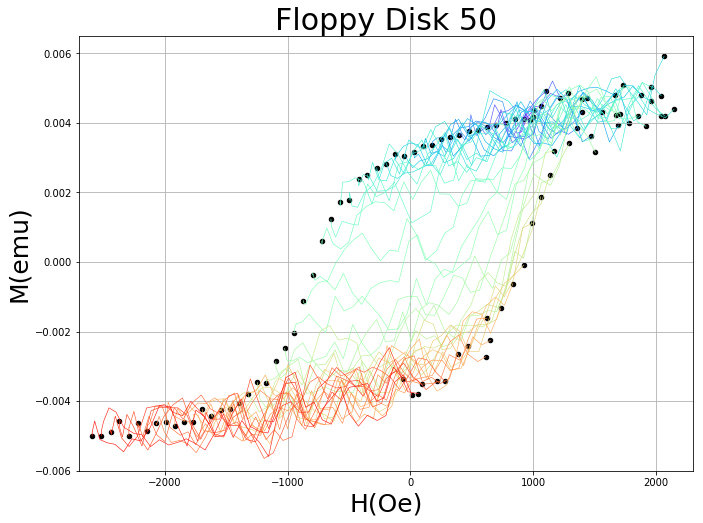

In [19]:
graph1,Fr1,F1 = grafica_Forc(data1)
plt.show(graph1)

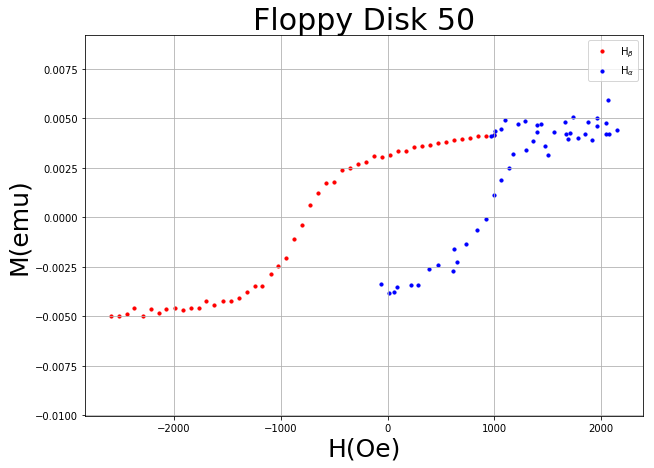

In [20]:
fig = plt.figure(figsize=(w-1,h-1))
plt.scatter(Fr1[:,0],Fr1[:,1],s=10,c='r',label=r'H$_\beta$')
plt.scatter(F1[:,0],F1[:,1],s=10,c='b',label=r'H$_\alpha$')
plt.title('Floppy Disk 50',size=30)
plt.ylabel('M(emu)',size=25)
plt.xlabel('H(Oe)',size=25)
plt.grid()
plt.legend(loc=0)
plt.show()

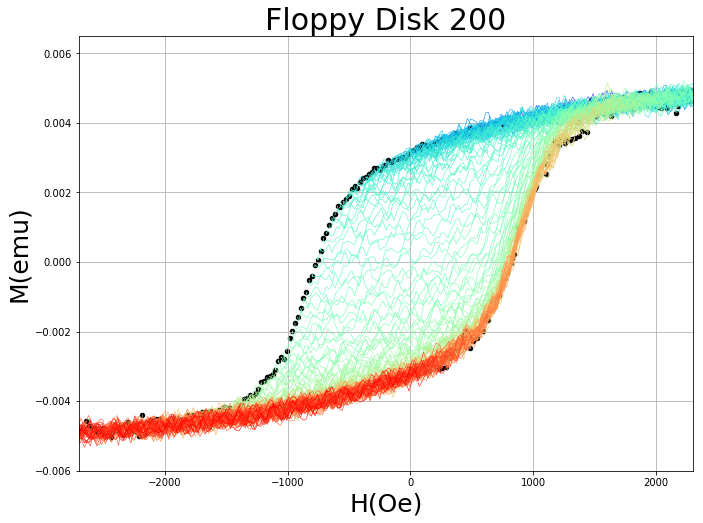

In [21]:
graph2,Fr2,F2 = grafica_Forc(data2)
plt.show(graph2)

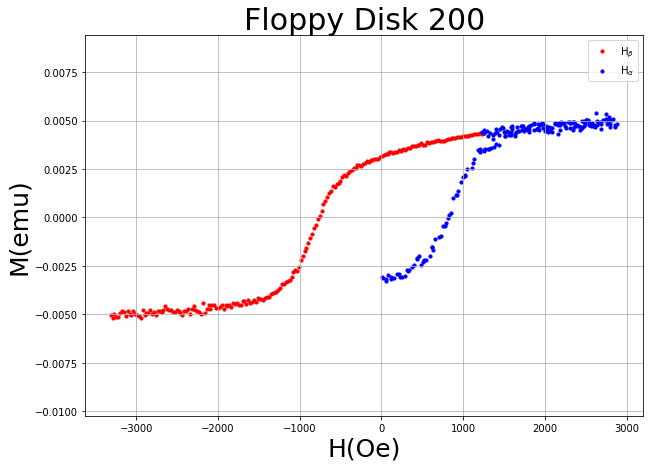

In [22]:
fig = plt.figure(figsize=(w-1,h-1))
plt.scatter(Fr2[:,0],Fr2[:,1],s=10,c='r',label=r'H$_\beta$')
plt.scatter(F2[:,0],F2[:,1],s=10,c='b',label=r'H$_\alpha$')
plt.title('Floppy Disk 200',size=30)
plt.ylabel('M(emu)',size=25)
plt.xlabel('H(Oe)',size=25)
plt.grid()
plt.legend(loc=0)
plt.show()

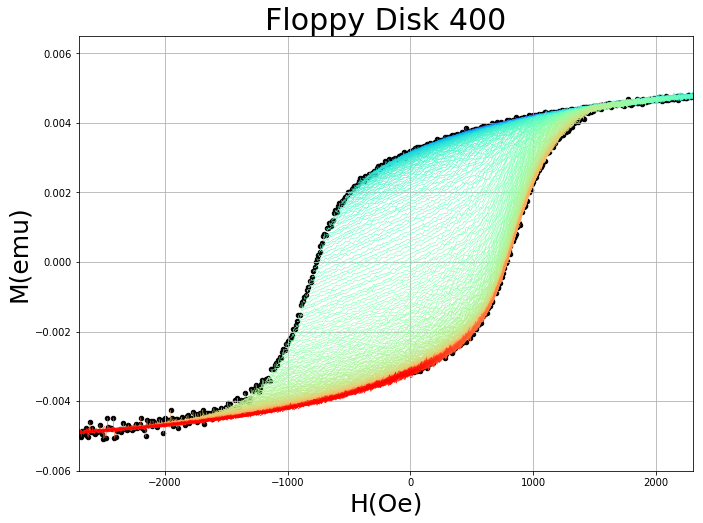

In [23]:
graph3,Fr3,F3 = grafica_Forc(data3)
plt.show(graph3)

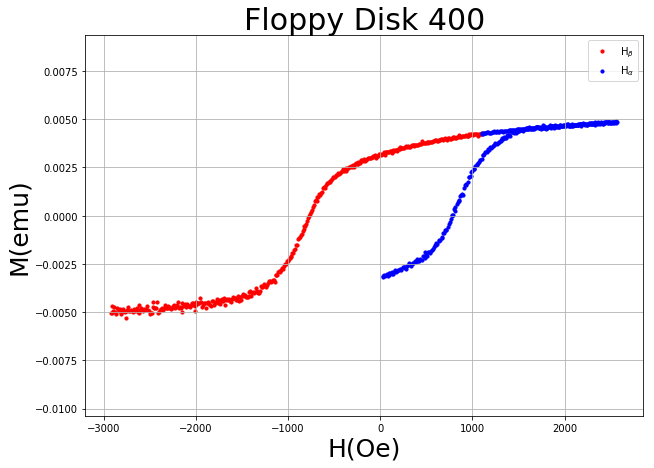

In [24]:
fig = plt.figure(figsize=(w-1,h-1))
plt.scatter(Fr3[:,0],Fr3[:,1],s=10,c='r',label=r'H$_\beta$')
plt.scatter(F3[:,0],F3[:,1],s=10,c='b',label=r'H$_\alpha$')
plt.title('Floppy Disk 400',size=30)
plt.ylabel('M(emu)',size=25)
plt.xlabel('H(Oe)',size=25)
plt.grid()
plt.legend(loc=0)
plt.show()

##  <center> Nuevos ejes  </center>
## $$H_c = \frac{H_\alpha - H_\beta}{2}$$
## $$H_u = \frac{H_\alpha + H_\beta}{2}$$


![alt text](disk.png)

![alt text](hystF.png)

![alt text](preis.png)